In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("ggplot")

# Função para obter dados com dividendos
def get_data_with_dividends(tickers):
    data = yf.download(tickers, start='2020-01-01', end='2022-01-01')
    dividend_data = {}
    for ticker in tickers:
        dividend_data[ticker] = yf.Ticker(ticker).dividends
        dividend_data[ticker].fillna(0)    
    return data, dividend_data

# Plot das séries temporais de preços ajustados
def time_series_plot(data, names=None):
    adj_close_data = data['Adj Close']
    plt.figure(figsize=(20, 20))
    for i, ticker in enumerate(adj_close_data.columns, 1):
        plt.subplot(5, 2, i)
        plt.plot(adj_close_data[ticker], linewidth=2)
        plt.grid()
        plt.ylabel('Adj Close')
        plt.title(f'{ticker} ({names[i-1]}) Adj Close')
    plt.tight_layout()
    plt.show()

# Função para calcular o retorno total (com dividendos)
def total_return(data, dividend_data):
    adj_close_data = data['Adj Close']
    total_returns = {}
    for stock_name in adj_close_data.columns:
        total_returns[stock_name]=(
            (adj_close_data[stock_name].shift(-1) + dividend_data[stock_name].shift(-1) - adj_close_data[stock_name]) / adj_close_data[stock_name]
            )  # TR formula: ((P_t+1 + D_t+1) - P_t) / P_t

    return pd.DataFrame(total_returns, index=data.index)

def total_return_wout_dividend(data):
    adj_close_data = data['Adj Close']
    total_returns = {}
    for stock_name in adj_close_data.columns:
        total_returns[stock_name]=(
            ((adj_close_data[stock_name]).shift(-1) - adj_close_data[stock_name]) / adj_close_data[stock_name]
            )  # TR formula: (P_t+1 - P_t) / P_t

    return pd.DataFrame(total_returns, index=data.index)


# Função para calcular a média móvel
def moving_avg(data, n_days):
    return data['Adj Close'].rolling(window=n_days).mean()

# Função para preparar os dados de features
def prepare_features(data, dividend_data, stock):
    features = pd.DataFrame(index=data.index)
    features['Volume'] = data['Volume'][stock]
    features['Daily Return'] = data['Adj Close'][stock].pct_change()
    features['Total Return'] = total_return(data, dividend_data)[stock]
    features['5-day MA'] = moving_avg(data, 5)[stock]
    features.dropna(inplace=True)
    return features

# Função para preparar a variável target
def prepare_target(data, stock):
    return data['Adj Close'][stock].dropna()

# Função para plotar o volume de vendas
def volume_sales_plot(data, names=None):
    volume_data = data['Volume']
    plt.figure(figsize=(20, 20))
    for i, ticker in enumerate(volume_data.columns, 1):
        plt.subplot(5, 2, i)
        plt.plot(volume_data[ticker], linewidth=2)
        plt.grid()
        plt.ylabel('Volume')
        plt.title(f'{ticker} ({names[i-1]}) Volume')
    plt.tight_layout()
    plt.show()

# Função para plotar a média móvel
def moving_avg_plot(data, days_list, names=None):
    adj_close_data = data['Adj Close']
    plt.figure(figsize=(20, 20))
    for i, ticker in enumerate(adj_close_data.columns, 1):
        plt.subplot(5, 2, i)
        plt.plot(adj_close_data[ticker], linewidth=3, label='Adj Close')
        for n in days_list:
            moving_avg_data = moving_avg(data, n)
            plt.plot(moving_avg_data[ticker], linewidth=2, label=f'{n}-day MA')
        plt.grid()
        plt.ylabel('Price')
        plt.title(f'{ticker} ({names[i-1]}) - Adj Close and Moving Averages')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Função para calcular o retorno diário
def daily_return(data):
    adj_close_data = data['Adj Close']
    return adj_close_data.pct_change()

# Função para plotar o retorno total
def total_return_plot(data, dividend_data, names=None):
    total_return_data = total_return(data, dividend_data)
    plt.figure(figsize=(20, 20))
    for i, ticker in enumerate(total_return_data.columns, 1):
        plt.subplot(5, 2, i)
        plt.plot(total_return_data[ticker], linewidth=2)
        plt.grid()
        plt.ylabel('Total Return')
        plt.title(f'{ticker} ({names[i-1]}) - Total Return (with Dividends)')
    plt.tight_layout()
    plt.show()


# Função para plotar o retorno total
def total_return_wout_dividend_plot(data, names=None):
    total_return_data = total_return_wout_dividend(data)
    plt.figure(figsize=(20, 20))
    for i, ticker in enumerate(total_return_data.columns, 1):
        plt.subplot(5, 2, i)
        plt.plot(total_return_data[ticker], linewidth=2)
        plt.grid()
        plt.ylabel('Total Return')
        plt.title(f'{ticker} ({names[i-1]}) - Total Return (without Dividends)')
    plt.tight_layout()
    plt.show()

# Função para plotar o histograma do retorno diário
def daily_return_hist(data, dividend_data, names=None):
    total_return_data = total_return(data, dividend_data)
    plt.figure(figsize=(20, 20))
    for i, ticker in enumerate(total_return_data.columns, 1):
        plt.subplot(5, 2, i)
        sns.histplot(total_return_data[ticker], bins=100, kde=True)
        plt.grid()
        plt.xlim(-0.2, 0.2)
        plt.xlabel('Total Return')
        plt.ylabel('Frequency')
        plt.title(f'{ticker} ({names[i-1]}) - Total Return Distribution (with Dividends)')
    plt.tight_layout()
    plt.show()


In [2]:
# Obtenção de dados
tickers = ['PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BBAS3.SA', 'ABEV3.SA']
names = ['Petrobras', 'Itaú Unibanco', 'Vale', 'Banco do Brasil', 'Ambev']
data, dividend_data = get_data_with_dividends(tickers)



## Fazendo a análise descritiva

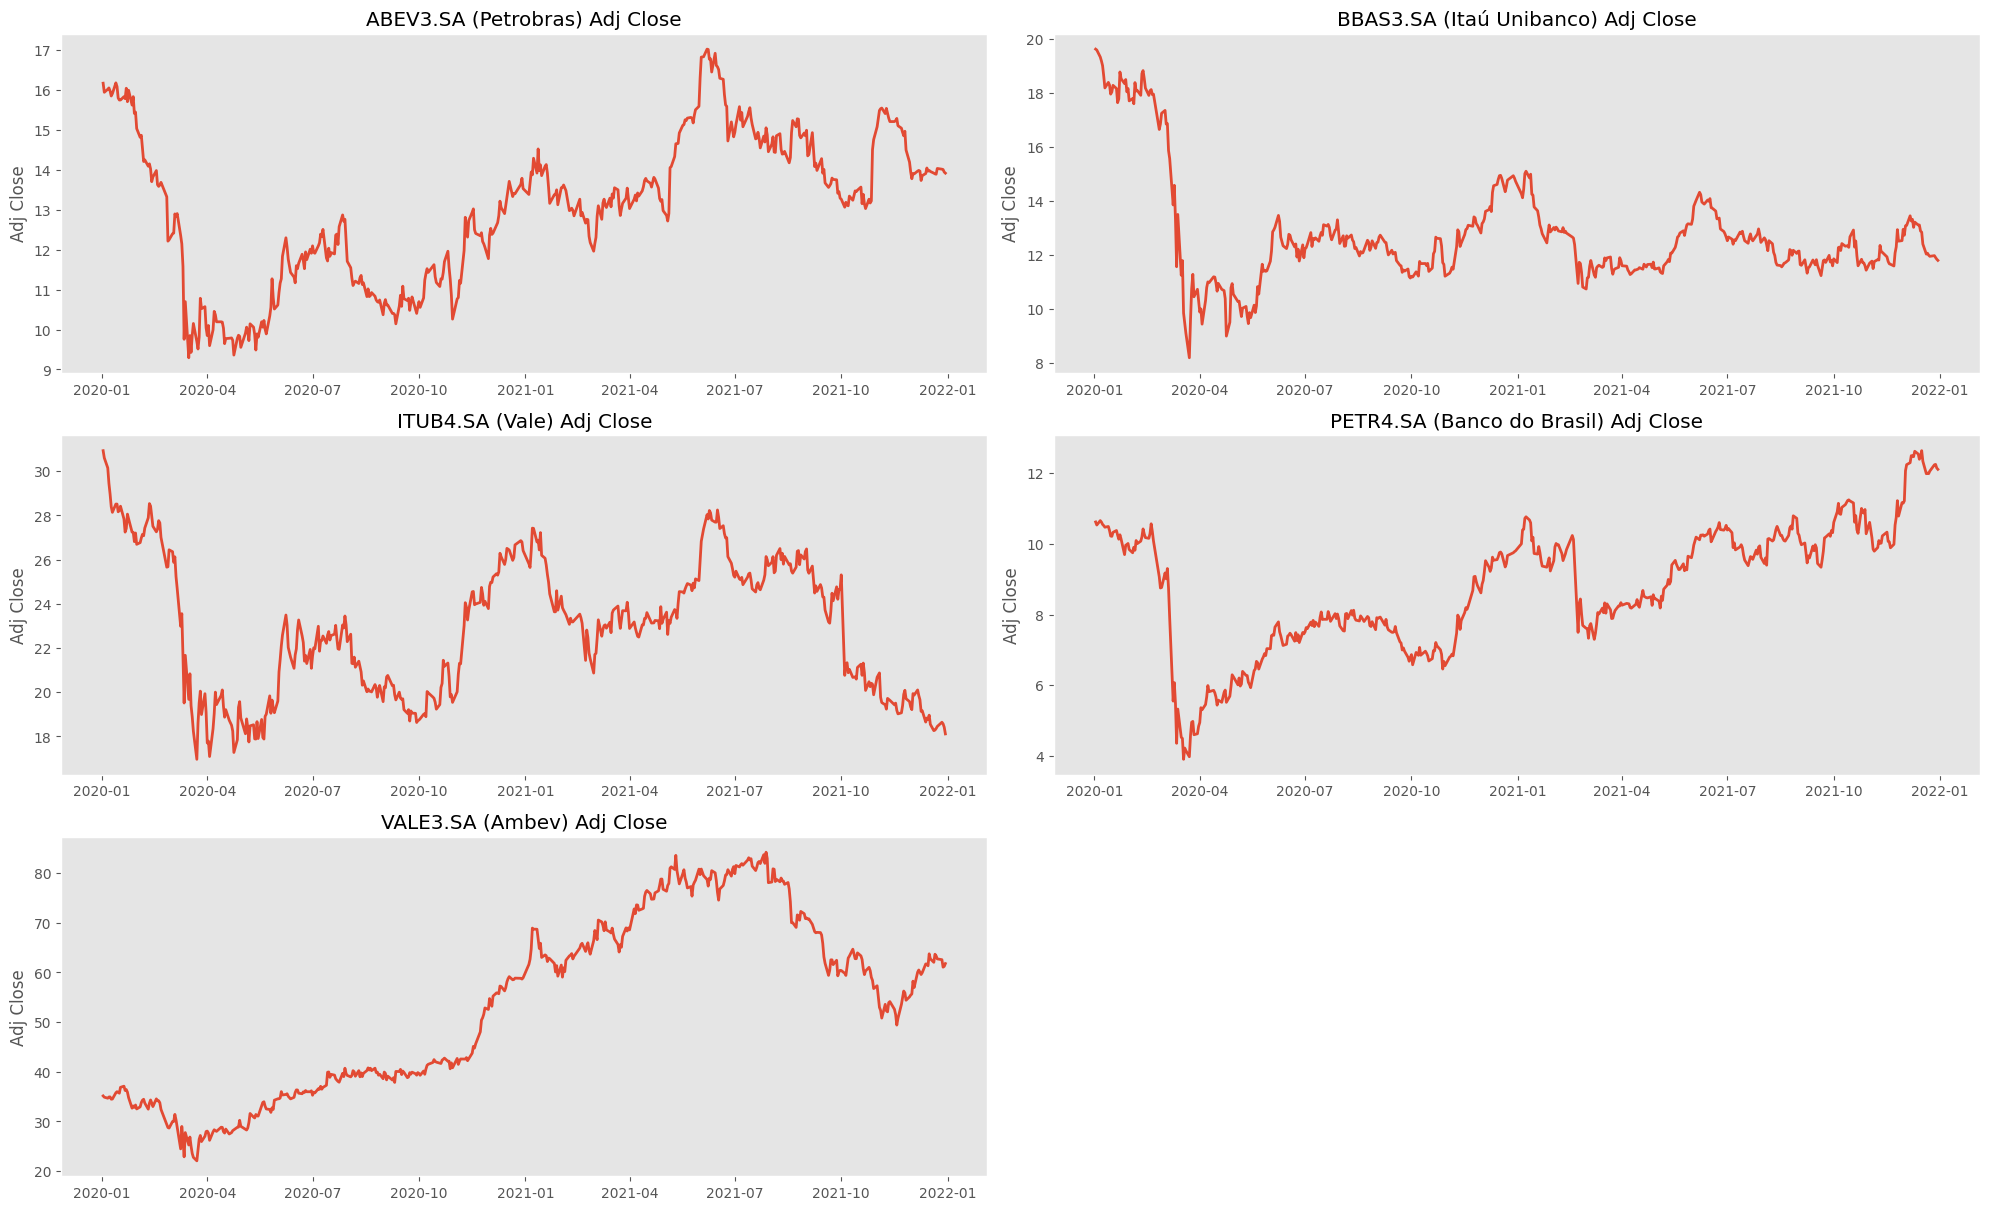

In [3]:
# Plot da série temporal de preços ajustados
time_series_plot(data, names)


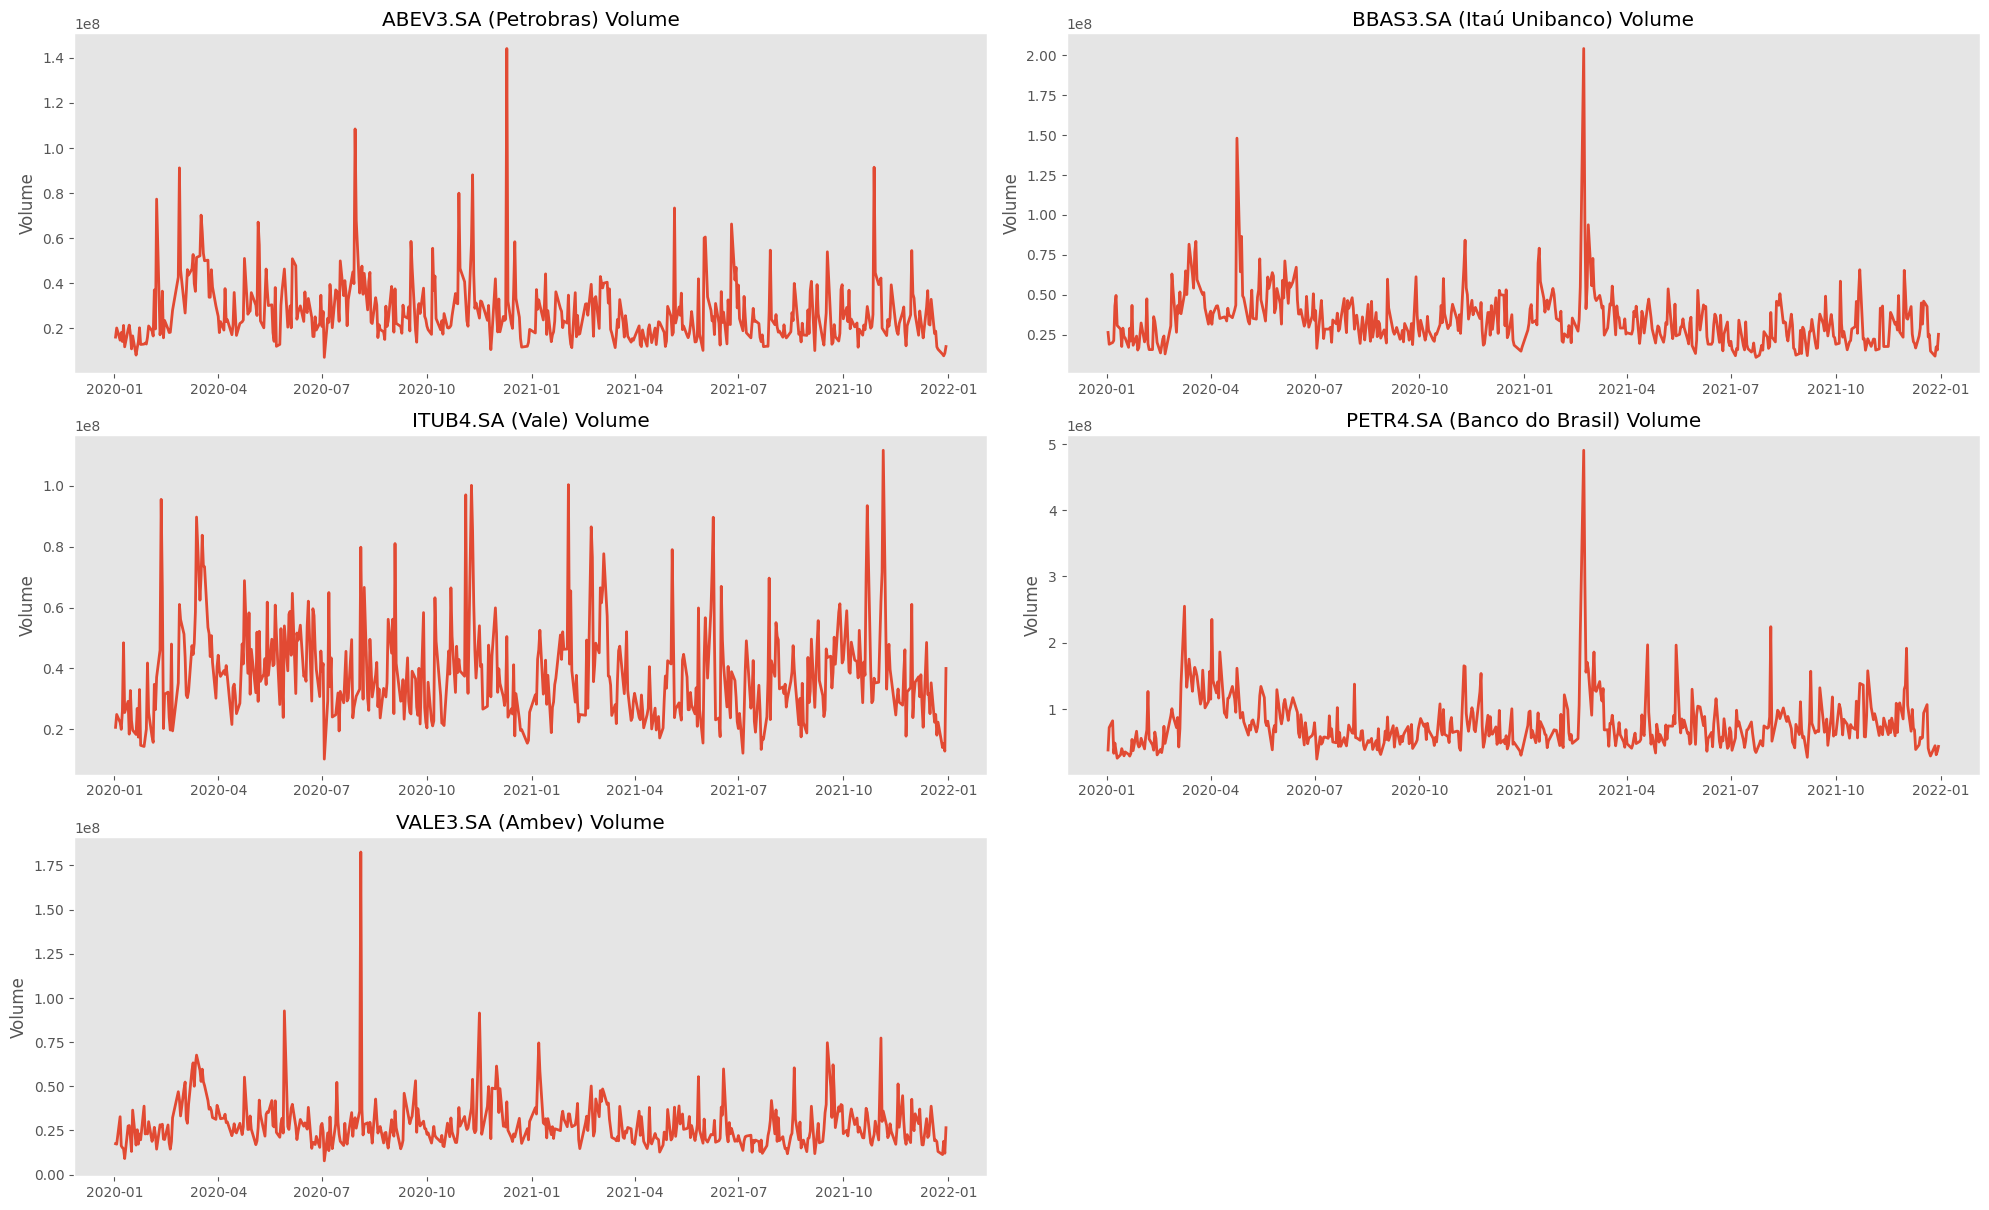

In [4]:
volume_sales_plot(data, names)

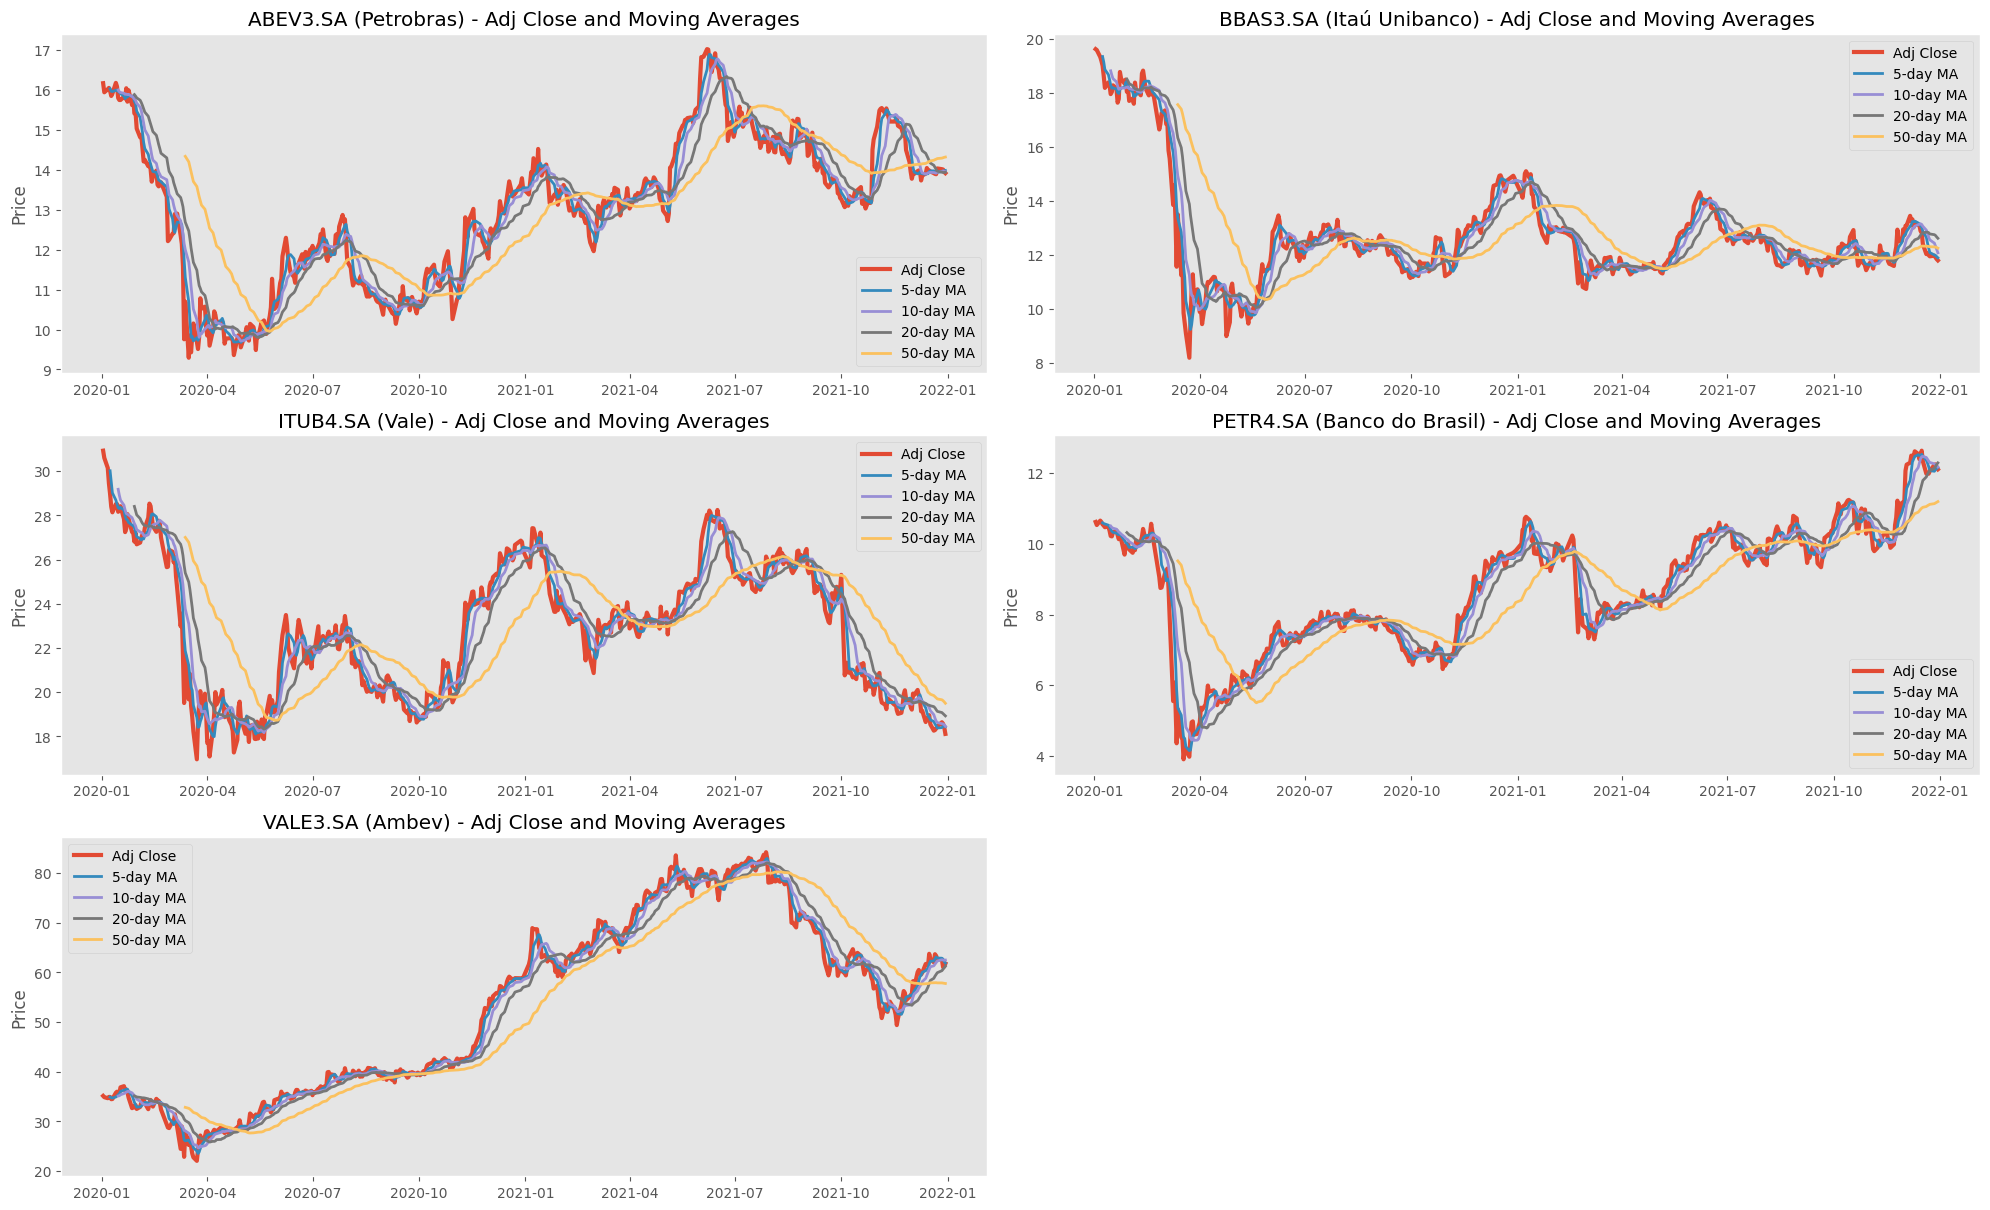

In [5]:
days = [5, 10, 20, 50]
moving_avg_plot(data, days, names)

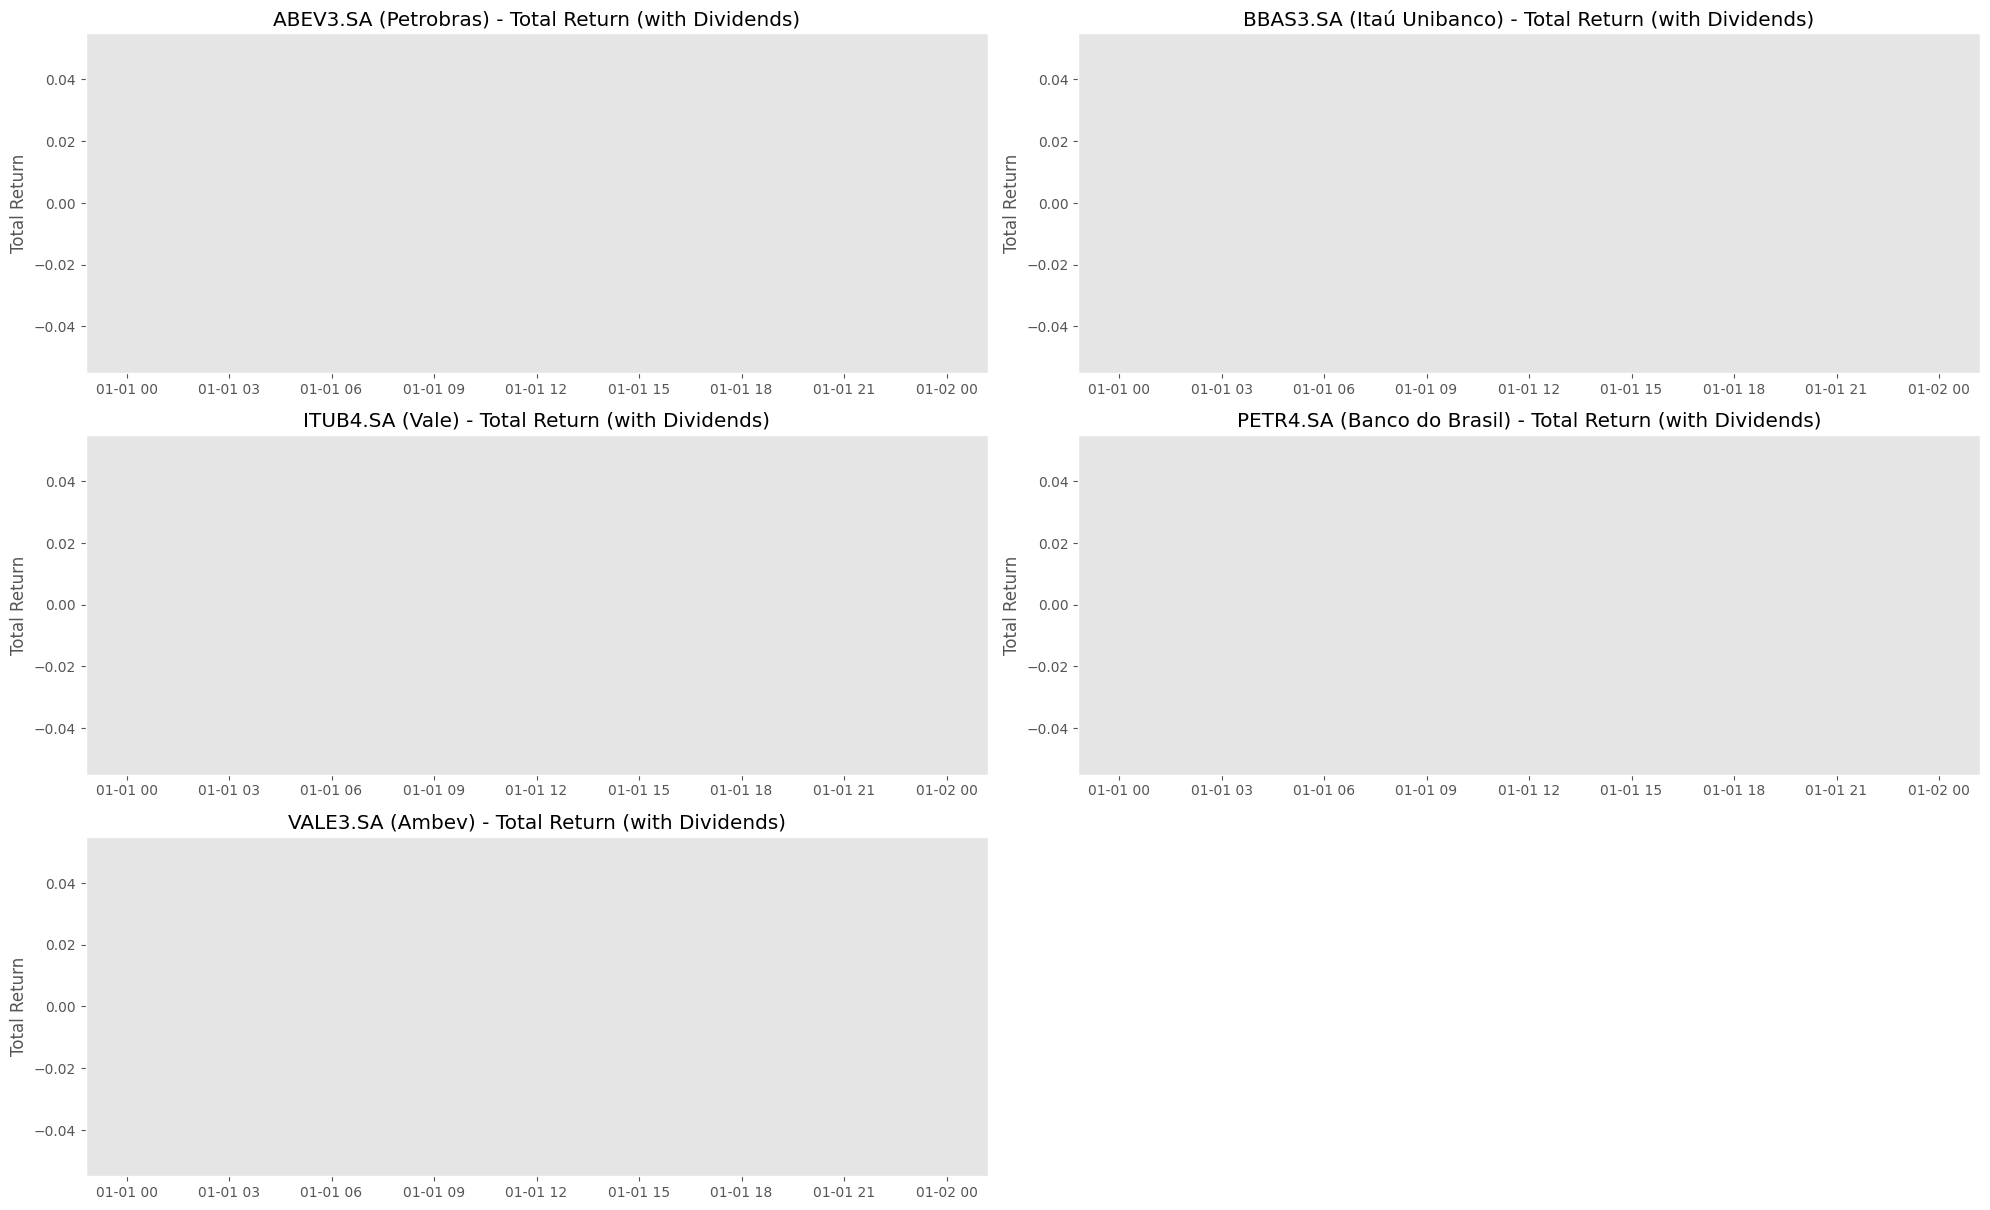

In [6]:

total_return_plot(data, dividend_data, names)

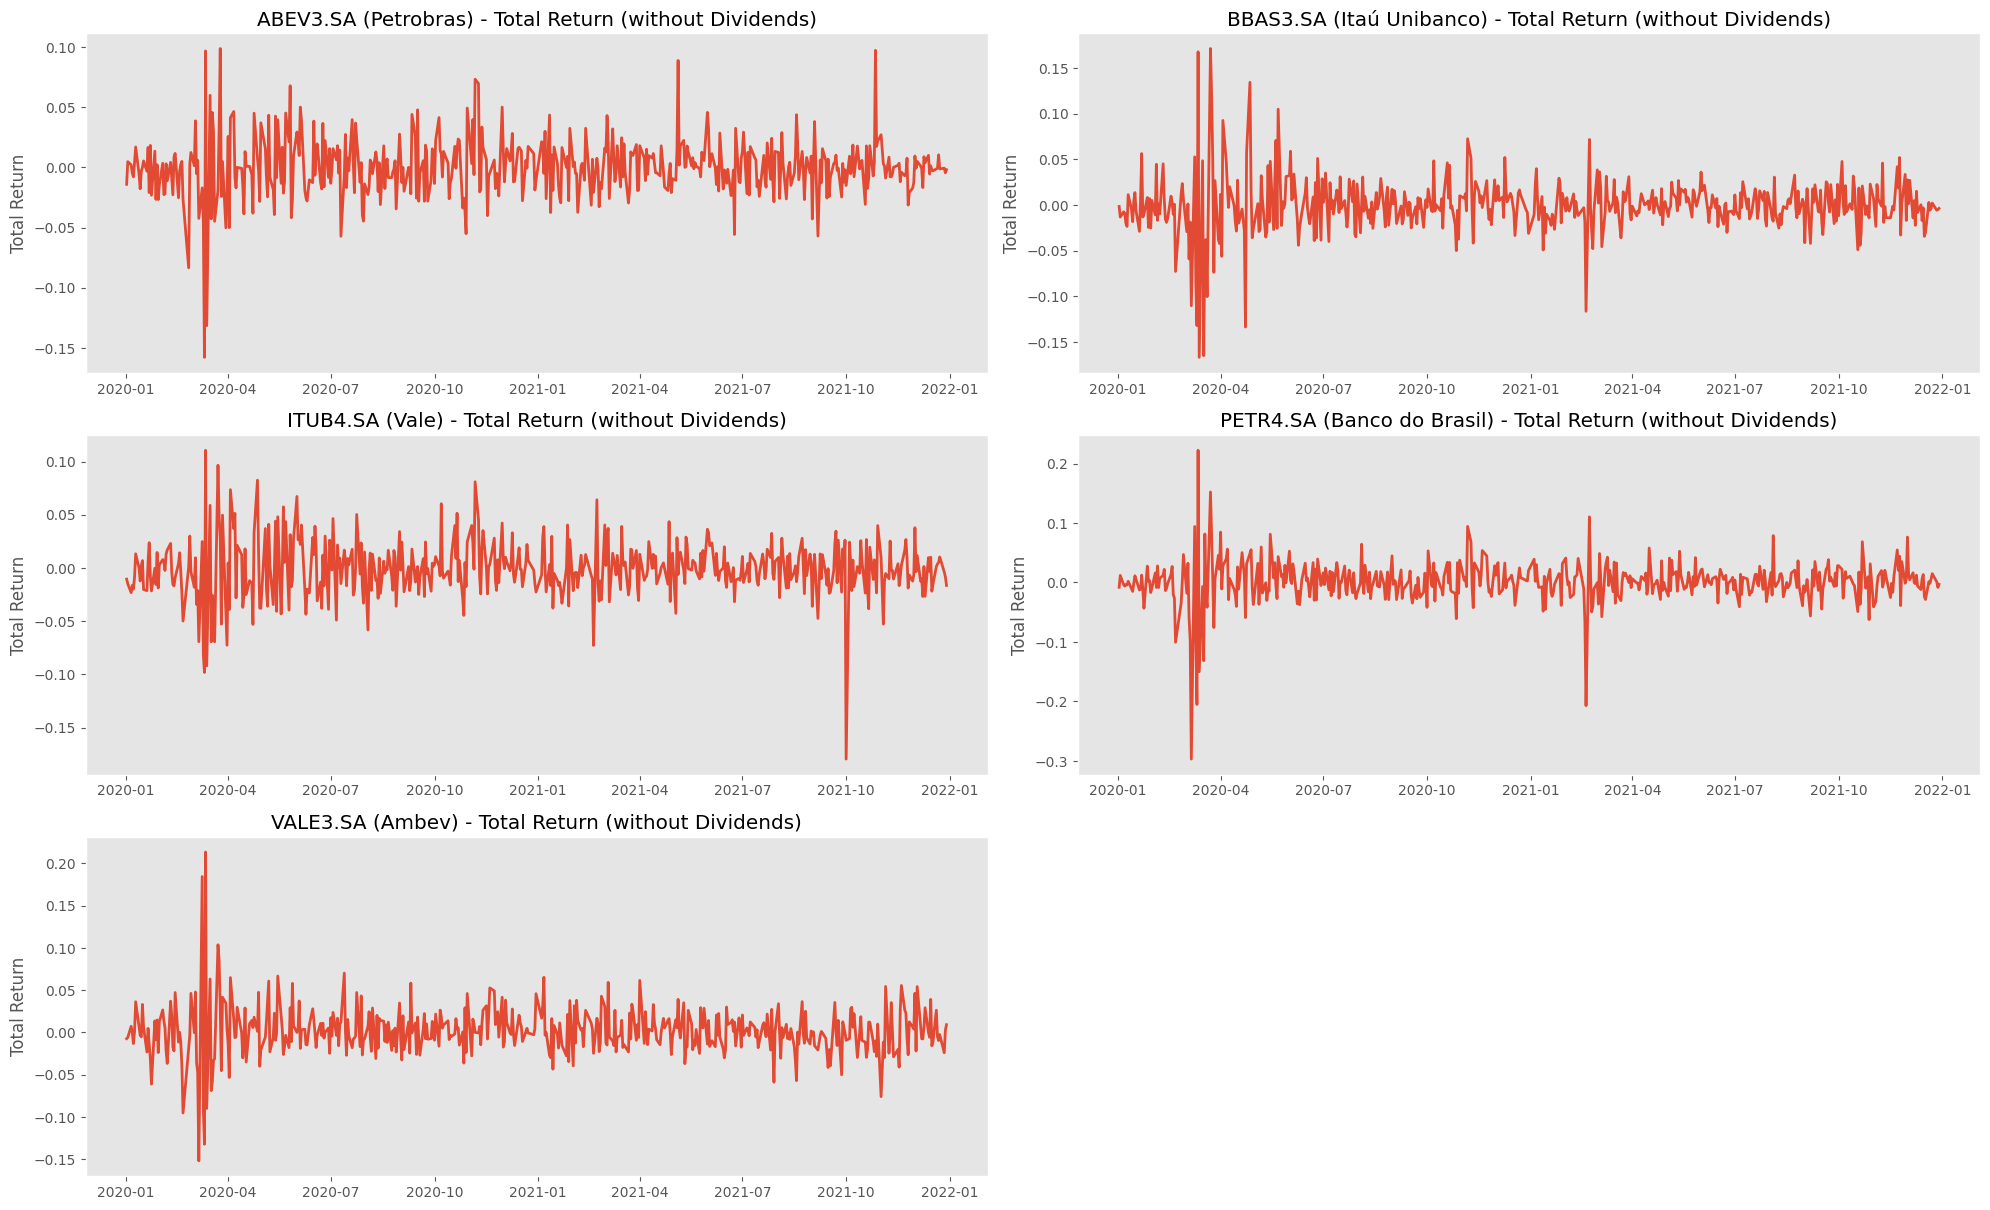

In [7]:
total_return_wout_dividend_plot(data, names)




In [8]:


data_wout = total_return_wout_dividend(data)

data_w = total_return(data, dividend_data)

np.sum(np.isclose(data_wout, data_w)==False)



np.int64(2475)

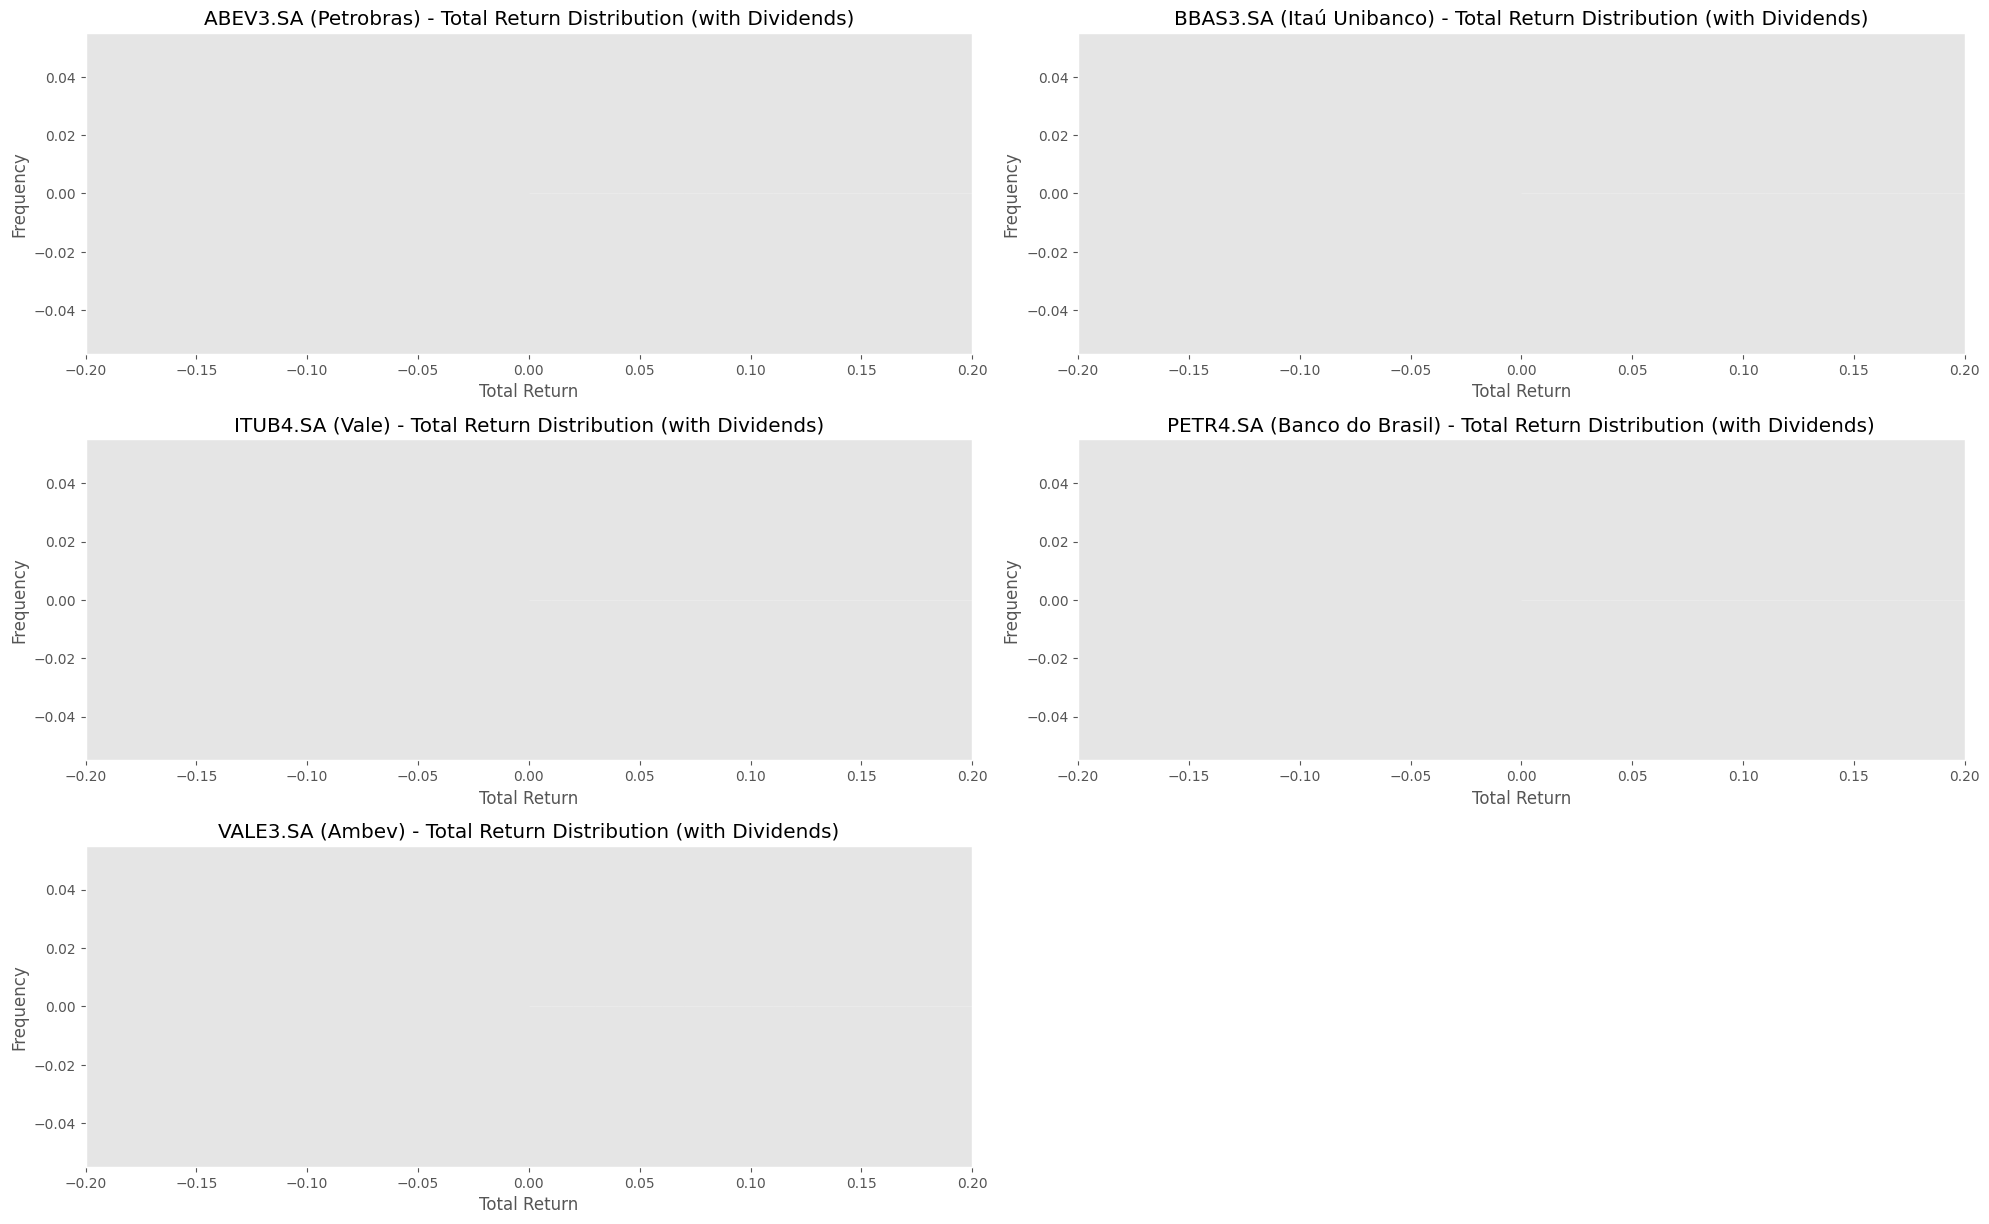

In [9]:
daily_return_hist(data, dividend_data, names)

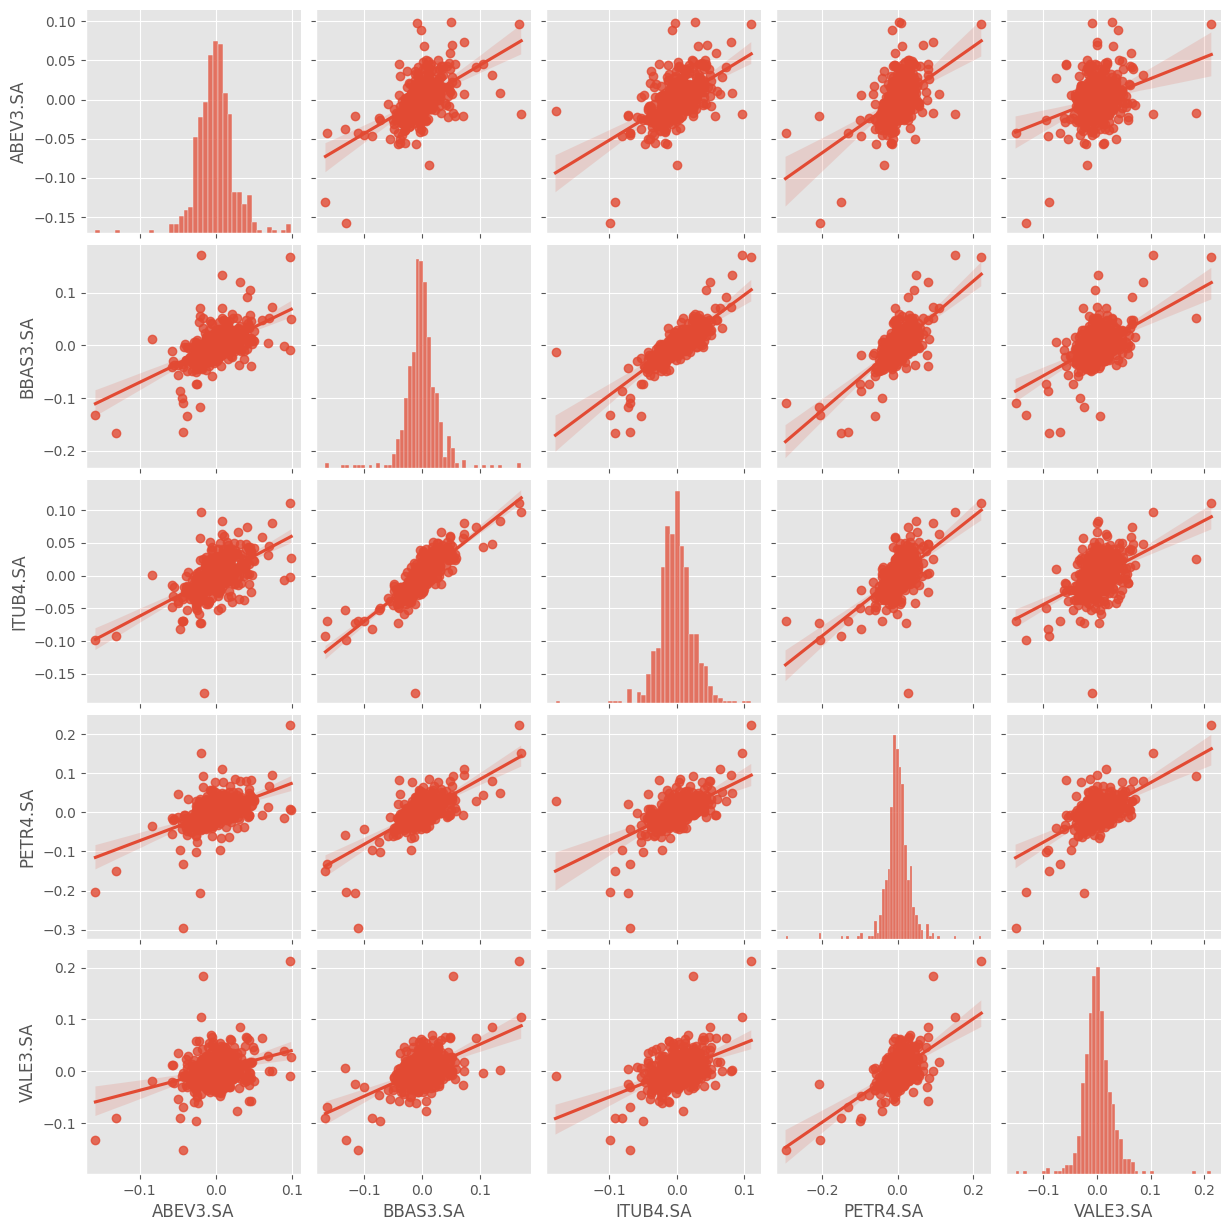

In [10]:
sns.pairplot(data['Adj Close'].pct_change(), kind = 'reg')

Text(0.5, 1.0, 'Return Correlation')

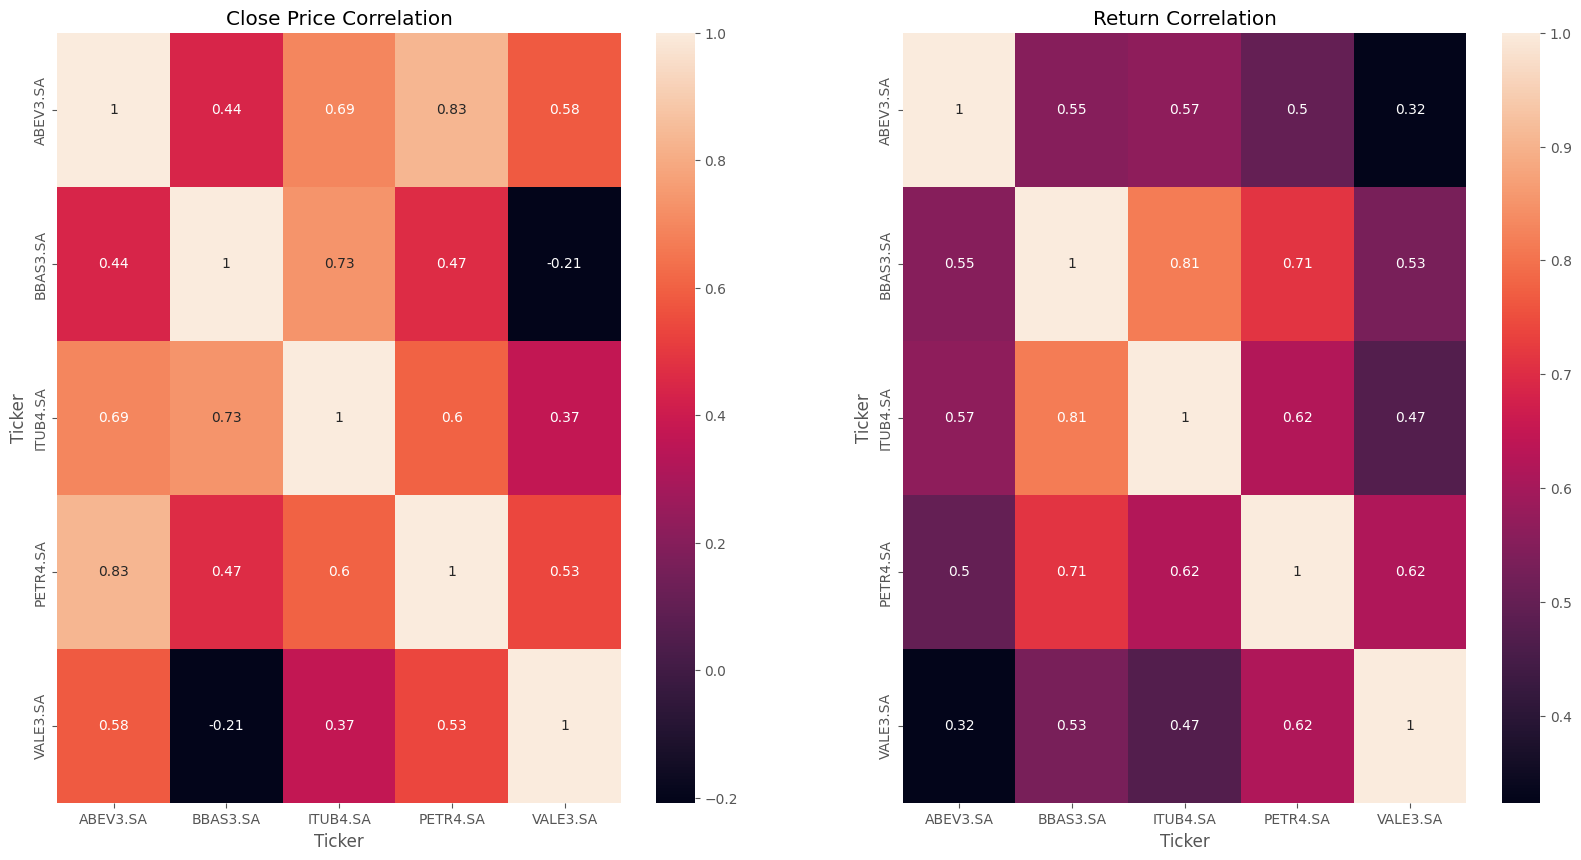

In [11]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.heatmap(data['Close'].corr(), annot=True)
plt.title('Close Price Correlation')

plt.subplot(1, 2, 2)
sns.heatmap(data['Adj Close'].pct_change().corr(), annot=True)
plt.title('Return Correlation')

## Fazendo o modelo de Regressão

In [12]:
# Análise para PETR4.SA
stock = 'PETR4.SA'

# Preparação das features e target
features = prepare_features(data, dividend_data, stock)
target = prepare_target(data, stock)

print(features.head())

# Alinhamento de features e target
aligned_data = features.join(target, how='inner', rsuffix='_target')
features_aligned = aligned_data[features.columns]
target_aligned = aligned_data[target.name]

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features_aligned, target_aligned, test_size=0.2, shuffle=False)

# Treinamento do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões e avaliação
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

# Plot do preço real vs previsto
plt.figure(figsize=(20, 10))
plt.plot(y_test.index, y_test, label='Real Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.grid()
plt.ylabel('Price')
plt.title(f'{stock} - Real vs Predicted Price')
plt.legend()
plt.show()

Empty DataFrame
Columns: [Volume, Daily Return, Total Return, 5-day MA]
Index: []


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
stocks = tickers

for stock in stocks:
    features = prepare_features(data, dividend_data, stock)
    target = prepare_target(data, stock)

    # Alinhamento de features e target
    aligned_data = features.join(target, how='inner', rsuffix='_target')
    features_aligned = aligned_data[features.columns]
    target_aligned = aligned_data[target.name]

    # Divisão em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(features_aligned, target_aligned, test_size=0.2, shuffle=False)

    # Treinamento do modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Previsões e avaliação
    y_pred = model.predict(X_test)
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'R2: {r2_score(y_test, y_pred)}')

    # Plot do preço real vs previsto
    plt.figure(figsize=(20, 10))
    plt.plot(y_test.index, y_test, label='Real Price')
    plt.plot(y_test.index, y_pred, label='Predicted Price')
    plt.grid()
    plt.ylabel('Price')
    plt.title(f'{stock} - Real vs Predicted Price')
    plt.legend()
    plt.show()